# Assignment 3 #
### Due: Monday, October 9th to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 15
2. Student Names -
  * Simran Kaur - sk57859
  * Nikhil Nair - nn8446

# Q1. (30 points) - Comparing MLPs

In this problem, we will be comparing different MLP configurations on the California Housing dataset and the Diabetes dataset.

In [1]:
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing, load_diabetes

import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
seed = 42

In [3]:
# Load the Calinifornia Housing dataset and do train/val/test split
california_housing = fetch_california_housing()
housing_X, housing_y = california_housing['data'], california_housing['target']
housing_X_train, housing_X_tmp, housing_y_train, housing_y_tmp = train_test_split(housing_X, housing_y, test_size=0.4, random_state=seed)
housing_X_val, housing_X_test, housing_y_val, housing_y_test = train_test_split(housing_X_tmp, housing_y_tmp, test_size=0.5, random_state=seed)

housing_scaler = StandardScaler()
housing_X_train = housing_scaler.fit_transform(housing_X_train)
housing_X_val = housing_scaler.transform(housing_X_val)
housing_X_test = housing_scaler.transform(housing_X_test)
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Load the Diabetes dataset and do train/val/test split
diabetes = load_diabetes()
diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

diabetes_X_train, diabetes_X_tmp, diabetes_y_train, diabetes_y_tmp = train_test_split(diabetes_X, diabetes_y, test_size=0.4, random_state=seed)
diabetes_X_val, diabetes_X_test, diabetes_y_val, diabetes_y_test = train_test_split(diabetes_X_tmp, diabetes_y_tmp, test_size=0.5, random_state=seed)

diabetes_scaler = StandardScaler()
diabetes_X_train = diabetes_scaler.fit_transform(diabetes_X_train)
diabetes_X_val = diabetes_scaler.transform(diabetes_X_val)
diabetes_X_test = diabetes_scaler.transform(diabetes_X_test)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Part 1** **(10 pts)**. Write the training and evaluation functions of the MLP. Use the default parameter values of sklearn.neural_network.MLPRegressor except:

*   **hidden_layer_size**: given by train_mlp parameter
*   **learning_rate_init**: given by a list of search space
*   **random_state**: given by train_mlp parameter
*   **max_iter**: fix at 300



In [5]:
def train_mlp(hidden_layer_size, X_train, y_train, X_val, y_val, seed):
    learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]
    best_r2 = -np.inf # Determine the best model based on the R2 score on validation set # TO HIDE
    for lr in learning_rate_list:
        # Initialize MLPRegressor
        model = MLPRegressor(hidden_layer_sizes=hidden_layer_size, learning_rate_init=lr, random_state=seed, max_iter=300)

        # Fit the MLPRegressor to training data
        model.fit(X_train, y_train)

        # Predict and evaluate on train and validation data
        mse_train, r2_train = eval_model(model, X_train, y_train)
        mse_val, r2_val = eval_model(model, X_val, y_val)
        print(f"Learning rate: {lr} MSE train: {mse_train} R2 train: {r2_train} MSE val: {mse_val} R2 val: {r2_val}")

        # Record the best model according to R2 score on validation set
        if r2_val > best_r2:
            best_model = model
            best_lr = lr
            best_r2 = r2_val

    return best_model, best_lr, best_r2

def eval_model(model, X, y):
    # Predict and evaluate
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2


**Part 2** **(5 pts)**.
Train two MLPs on the **housing dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)



In [6]:
### START CODE ###
best_model, best_lr, best_r2 = train_mlp(8, housing_X_train, housing_y_train, housing_X_val, housing_y_val, 42)
mse_test, r2_test = eval_model(best_model, housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 0.35027525329597253 R2 train: 0.7359828150790377 MSE val: 0.3726774082641398 R2 val: 0.7144970949890302
Learning rate: 0.01 MSE train: 0.334521824008715 R2 train: 0.7478568370492932 MSE val: 0.3535165128445652 R2 val: 0.7291759866620737
Learning rate: 0.001 MSE train: 0.3343894234574139 R2 train: 0.7479566329112834 MSE val: 0.3549904264505432 R2 val: 0.7280468422414288
Learning rate: 0.0001 MSE train: 0.4331418308870668 R2 train: 0.673522791615294 MSE val: 0.4592155463352194 R2 val: 0.6482014482295081
Test MSE: 0.35000842201340565 Test R2: 0.7447291587040576


In [7]:
### START CODE ###
best_model, best_lr, best_r2 = train_mlp((64, 64), housing_X_train, housing_y_train, housing_X_val, housing_y_val, 42)
mse_test, r2_test = eval_model(best_model, housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 0.298264700575399 R2 train: 0.7751853553277668 MSE val: 0.32681688432404304 R2 val: 0.7496301954128227
Learning rate: 0.01 MSE train: 0.16854813399621166 R2 train: 0.8729581851911187 MSE val: 0.30977096680166805 R2 val: 0.7626888323553824
Learning rate: 0.001 MSE train: 0.20584124261737996 R2 train: 0.844848801320963 MSE val: 0.2868031436019081 R2 val: 0.7802841576954742
Learning rate: 0.0001 MSE train: 0.26741512902207076 R2 train: 0.7984379744062986 MSE val: 0.31262030057434054 R2 val: 0.760505997948454
Test MSE: 0.2714596719780807 Test R2: 0.8020169387778013


**Part 3** **(5 pts)**. Train a **linear regression model** on the **housing dataset** and show their MSE and R2 scores on the test set. How do the performances of the two MLPs and the linear regression model compare, and what do you think causes the difference?

In [8]:
### START CODE ###
model = LinearRegression()
model.fit(housing_X_train, housing_y_train)
y_pred = model.predict(housing_X_test)
mse_test = mean_squared_error(housing_y_test, y_pred)
r2_test = r2_score(housing_y_test, y_pred)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 0.5546246533101034 Test R2: 0.5954968710766684


> The difference in performance can be attributed to the complexity of the models. MLP 2 with its two hidden layers and more neurons, had the capacity to capture complex patterns in the data, leading to the best results among the 3. MLP 1, although simpler, still performed reasonably better than the linear regression. This may be because the linear regression assumes a linear relationship between features and the target variable, which may not hold in cases with more intricate data patterns, resulting in poorer performance. The choice of hyperparameters, such as learning rate and architecture, also played a role in determining the models' performance.

**Part 4** **(5 pts)**. Now, train two MLPs on the **diabetes dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)

In [9]:
### START CODE ###
best_model, best_lr, best_r2 = train_mlp(8, diabetes_X_train, diabetes_y_train, diabetes_X_val, diabetes_y_val, 42)
mse_test, r2_test = eval_model(best_model, diabetes_X_test, diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 2476.3467595024326 R2 train: 0.585898539459291 MSE val: 2517.6324149131624 R2 val: 0.5632838571464869
Learning rate: 0.01 MSE train: 2923.5109570774443 R2 train: 0.511122522487204 MSE val: 2897.769455293564 R2 val: 0.4973441349506217
Learning rate: 0.001 MSE train: 23187.857938274905 R2 train: -2.8775368603787332 MSE val: 21269.44841782192 R2 val: -2.689462932964871
Learning rate: 0.0001 MSE train: 28400.91006149956 R2 train: -3.7492776575100377 MSE val: 26368.757515117697 R2 val: -3.5740045312528217
Test MSE: 3031.3140854025273 Test R2: 0.4759604846674894


In [10]:
### START CODE ###
best_model, best_lr, best_r2 = train_mlp((64, 64), diabetes_X_train, diabetes_y_train, diabetes_X_val, diabetes_y_val, 42)
mse_test, r2_test = eval_model(best_model, diabetes_X_test, diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 1206.425309814796 R2 train: 0.7982582685924144 MSE val: 3723.543740013166 R2 val: 0.35410282682550287
Learning rate: 0.01 MSE train: 2243.7063917974406 R2 train: 0.6248012963844647 MSE val: 2647.383790966997 R2 val: 0.5407767905292498
Learning rate: 0.001 MSE train: 2708.36400051836 R2 train: 0.5470999834789378 MSE val: 2934.4456382474013 R2 val: 0.49098217318872484
Learning rate: 0.0001 MSE train: 25172.631134438427 R2 train: -3.2094360486565927 MSE val: 23365.034950969686 R2 val: -3.05296971908306
Test MSE: 3048.801456733653 Test R2: 0.47293734904425166


**Part 5** **(5 pts)**. Train another linear regression model on the **diabetes dataset** and show its **MSE** and **R2 score** on the **test set**. How do the performances of two MLPs and the linear regression model compare? Is the performance order on the diabetes dataset the same as the one on the housing dataset? If not, what causes the difference?

In [11]:
### START CODE ###
model = LinearRegression()
model.fit(diabetes_X_train, diabetes_y_train)
y_pred = model.predict(diabetes_X_test)
mse_test = mean_squared_error(diabetes_y_test, y_pred)
r2_test = r2_score(diabetes_y_test, y_pred)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 3245.611400975238 Test R2: 0.4389137589815666


> Here also the MLP is performing better than the Linear model, the difference in performance can be attributed to the complexity of the models. It seems like the MLP can better capture complex patterns in the data than the linear model. This may be because the linear regression assumes a linear relationship between features and the target variable, which may not hold in cases with more intricate data patterns, resulting in poorer performance. The only difference between Housing data and diabetes data is that the MLP 1 performed better in the diabetes data than MLP 2, which may be attributed to overfitting, or the random starting point, we need to do more analysis to understand better.

# Q2. (20 points) Tensorflow Playground
In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).


Select **Classification** as the Problem Type. Among the four datasets shown in DATA, please select the top left dataset.

Use the following settings as the DEFAULT settings for all subquestions:


*   Learning rate = 0.03
*   Activation = Tanh
*   Regularization = None
*   Ratio of training to test data = 50%
*   Noise = 0
*   Batch Size = 30
*   input as  𝑋1  with  𝑋2
*   One hidden layer with 4 neurons

## Part A
a) **(4 pts)** Use the DEFAULT setting and run two experiments -

1.   Using Tanh as the activation function
2.   Using the Linear activation function.

Report the train, test losses for both at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this?

1.   Using Tanh as the activation function
      > Test Loss : 0.011
      
      > Training Loss : 0.007
      
2.   Using the Linear activation function.
      > Test Loss : 0.507
      
      > Training Loss : 0.498

        > We observe that both the Training and Test Loss for tanh function is very less than the loss in the Linear function. It seems like that with a Tanh function, the neural network is better able to capture the underlying patterns of the data, which suggests that decision boundary is likely to be non-linear and can adapt to complex relationships in the data. Linear activation function does not introduce non-linearity to the model. As a result, it may struggle to capture non-linear patterns, leading to higher training and test losses. The decision boundary is non-lineariaty in this case.

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with Tanh as the activation.

## Part B
b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT.

1.   Report the training loss and test loss at the end of 1000 epochs using 2 neurons and 8 neurons in the hidden layer.
     
     **With 2 neurons :**
     > Test loss 0.295
     
     > Training loss 0.221
     
     **With 8 neurons :**
     > Test loss 0.011
     
     > Training loss 0.005

     
2.   What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this?
     > As we increase the neurons in a hidden layer, the model's capacity to capture complexity and decision boundary increases, thus it results in a better model and more flexible model that can better discern more complex patterns.

## Part C
c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT.

1.   For learning rate 10, 1, 0.1, 0.01 and 0.0001, report the train, test losses at the end of 100 epochs, 500 epochs and 1000 epochs respectively.
       > | Learning Rate | 100 epoch Test Loss | 100 epoch Training Loss | 500 epoch Test Loss | 500 epoch Training Loss | 1000 epoch Test Loss | 1000 epoch Training Loss |
     |:--:|:---:|:-----------------------:|:-------------------:|:-----------------------:|:--------------------:|:------------------------:|
        |10|0.297|0.199|0.283|0.192|0.283|0.192|
        |1|0.008|0.002|0.007|0.000|0.006|0.000|
        |0.1|0.036|0.029|0.009|0.005|0.006|0.002|
        |0.01|0.435|0.433|0.087|0.076|0.037|0.030|
        |0.0001|0.565|0.554|0.533|0.528|0.507|0.506|



2.   What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? Also report your observations on the training and test loss curve (observe if you see noise for certain learning rates and reason why this is happening).
     > **Change of loss vs learning rate** :
     When the learning rate is set to an extremely high value (10), the loss curve is very noisy and the error is constantly high, regardless of the number of epochs. At learning rate of 1, the model converges to low error, but the curve is still very noisy.  Conversely, when the learning rate is set very low (0.0001), the model converges extremely slowly. Even after 100 epochs, the error remains close to 0.5, whereas models with more suitable learning rates(0.1) can achieve a lower training error in the same time frame. With such a small learning rate, training continues indefinitely, and even after 1000 epochs, the training error is still at 0.506. Therefore, it is crucial to select an optimal learning rare, as it should strike a balance between being too large and too small to achieve efficient and stable model convergence.

     > **Change of loss vs epoch numbers** :
     Both the Losses decrease as the number of epochs increases because the model's weights are continually updated, allowing the model to learn over time. The impact of the learning rate on loss can vary depending on the loss function. Typically, a smaller learning rate can lead to lower loss if sufficient epochs are provided. However, with a low number of epochs, it may result in higher loss as the model may fail to converge effectively.
       
     > **Observations on the training and test loss curve**:
     An optimal learning rate combined with a low number of epochs can yield lower loss because the larger steps toward the global minima allows for quicker convergence. In contrast, lower learning rates result in smoother training and test curves. However, when using a higher learning rate(10), we observed a significant noise in the learning curve, where the curve spiked a lot till more than 500 epochs.


## Part D
d) **(4 pts)** Effect of the number of layers:

1.   Change your activation to ReLU and use a single hidden layer with 4 neurons and then add another hidden layer with 3 neurons and train both your models for 1000 epochs.
     >| Hidden Layers | 100 epoch Test Loss | 100 epoch Training Loss |
        |:--:|:---:|:-----:|
        |1 with 4 neurons|0.006|0.005|
        |2 with 4 and 3 neurons resp.|0.005|0.004|
        
2.   Comment on your final models and decision boundaries and observe your training and test loss curves as well.
     > Adding more layers to the model doesn't seem to make a big difference in both the errors, but adding more layers will lead to faster convergence. This might be because having more layers allows the model to handle more complex patterns. Additionally, the loss curve tends to behave slightly better in terms of convergence when we use two layers instead of just one in the same number of epochs, indicating the potential advantages of having more layers in the model.

## Part E
e) **(4 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as  sin(𝑋1),𝑋21  etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc.
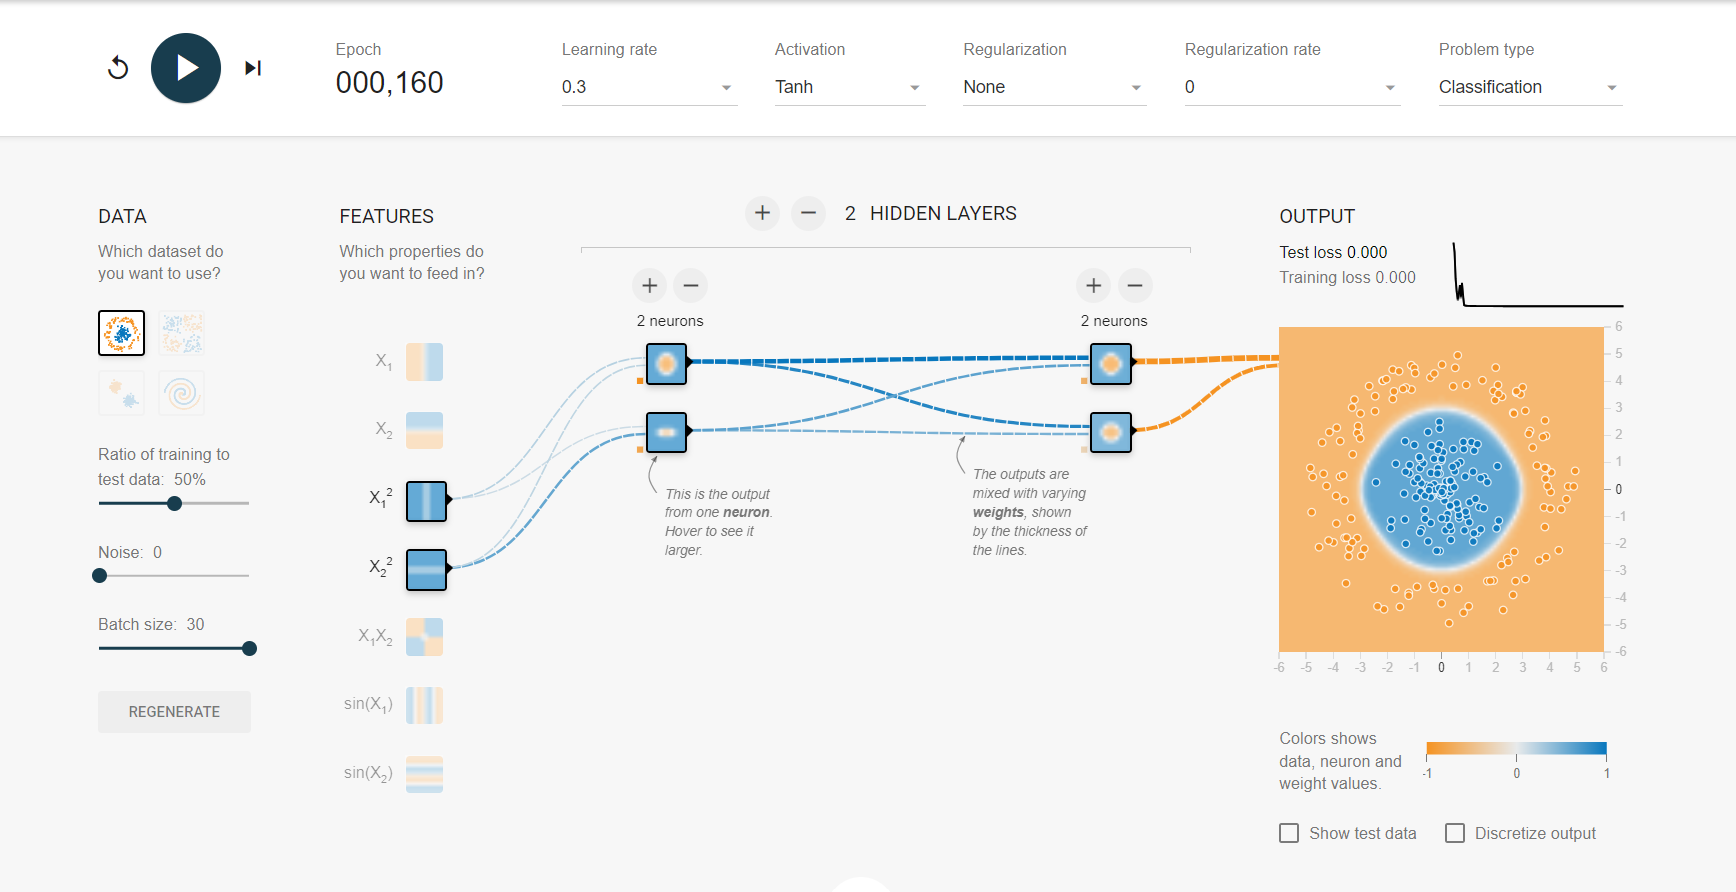
  
  >  The most favorable outcome was the training and testing errors of 0.0, were reached when our data points were centered at coordinates (0,0), indicating highly accurate classification. This achievement was realized by employing 2 hidden layers with 2 neurons each using the tanh activation function that operated on the features X1^2 and X2^2, this configuration outperformed others, even with only one hidden layer and a ReLU activation function, we obtained the lowest scores, but with a longer training time. This maybe because of the non-linear distribution of data points.
  However, when we applied sine functions to X1 and X2, we encountered limitations, as the errors couldn't be reduced beyond 0.5 for training and 0.4 for testing. In summary, squaring the features, increasing the number of layers, reducing neuron count, and employing simpler activation functions were strategies that helped us achieve the desired output with minimal epochs.

# Q3. (10 points) - Principal Component Analysis

**Part 1.** (5 points) Briefly explain the main principle behind the Principal Component Analysis algorithm. In what sense is the selection of the eigenvectors to represent the data an optimal choice.  How do you reconstruct (a noisy version of) the original data from the eigenvectors and the scores?

**Part 2**. (5 points) Read this [article](https://erdem.pl/2020/04/t-sne-clearly-explained) on t-SNE, a dimensionality reduction technique for visualization and explain it in your own words in one or two paragraphs.

> ## Part 1

**Principal** :
The main principle behind the Principal Component Analysis (PCA) algorithm is to reduce the dimensionality of a dataset while preserving as much of its relevant information as possible. It achieves this by transforming the original data into a new set of orthogonal (uncorrelated) eigen vectors called principal components. These principal components are linear combinations of the original features and are ordered in such a way that the first principal component explains the most variance in the data, the second principal component explains the second most variance, and so on. In essence, PCA identifies the directions in the data where the most significant variation occurs and projects the data onto these directions, effectively capturing the essential patterns in the data while reducing its dimensionality.

**In what Sense Eigen Vectors is Optimal Choice** :
The selection of eigenvectors is an optimal choice in the sense that it minimizes the reconstruction error while reducing the dimensionality of the data. By selecting the top eigenvectors, we retain the most significant information while discarding the less important variance.The percentage information retained by an eigen vector is given by the eigen value of that particular vector, which helps us to select the top eigen vectors which we want to keep, depending on the information we want to retain. The reconstruction error is minimized when we choose the eigenvectors that capture the highest variance in the data because those dimensions contain the most valuable information.

**Reconstruction (a noisy version of) the original data from the eigenvectors and the scores**:
In PCA, scores for data points are found by projecting the data point onto the eigen vectors (also called principal components) obtained during the PCA process. These scores quantify how data points align with the principal components in a reduced-dimensional space. To reconstruct an original data point from its scores, the scores are multiplied by the corresponding eigen vectors and then we do their vector summation to finally obtain the noisy version of our data. If our data was standardized, we need to scale by the standard deviation and add back the mean to this vector sum to get our original data point.

> ## Part 2

T-SNE, a dimensionality reduction method, offers valuable insights into feature associations and correlations. It is an iterative, non-deterministic technique designed for data that lacks linear separability and is particularly useful for reducing high-dimensional data into a lower-dimensional space. When working with data in an N-dimensional space, especially when it forms clusters with complex boundaries, T-SNE excels in capturing intricate patterns. However, it should be noted that running T-SNE on the same dataset multiple times may produce different reduced matrices, limiting its utility for machine learning training datasets compared to methods like PCA. Nonetheless, T-SNE proves advantageous for complex tasks, such as convolutional neural networks (CNNs), with high complexity and multiple layers.

T-SNE operates by computing similarity scores between each data point and all others, resulting in a matrix of similarity scores. It constructs a probability distribution for point similarity using a Gaussian distribution. However, density variations among data points can lead to differences in similarity scores when computed in opposite directions. To address this, T-SNE scales similarity values between 0 and 1, providing a generic scaled score that considers points from both directions. Additionally, the parameter perplexity, representing the expected density of points or desired cluster size, plays a crucial role. By employing optimizations like early compression and early exaggeration, T-SNE effectively handles dimensionality reduction challenges, ensuring more robust visualization and analysis of complex data patterns.

# Q4. (20 points) - Principal Component Analysis

In this problem we will be applying PCA and T-SNE on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

First use Principal Component Analysis (PCA) to solve this problem.  

* **Part 1. (5 points)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q4data.csv" file provided as a dataframe df.

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X.

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    




In [12]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("Q4data.csv")


In [14]:
y = df["critical_temp"]
X = df.drop(columns=["critical_temp"])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42)

scalar = StandardScaler()

### START CODE ###
### Scale the dataset
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)
### END CODE ###

* **Part 2 (5 points)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components`N = [3,20,40,60,81]`.(i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively).

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

In [15]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:
    ### START CODE ###
    ## Fit PCA
    pca = PCA(n_components=num)
    pca.fit(X_train_scaled)
    ### END CODE ###

    ### START CODE ###
    ## Transform Data
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    explained_variance = pca.explained_variance_ratio_
    var = explained_variance.cumsum()
    res.append(var[-1])
    ### END CODE ###

    print("Cumulative variance explained by {} components is {}".format(num,var[num-1])) #cumulative sum of variance explained with [n] features



Cumulative variance explained by 3 components is 0.5894367932307214
Cumulative variance explained by 20 components is 0.9694250088235418
Cumulative variance explained by 40 components is 0.9961464007803125
Cumulative variance explained by 60 components is 0.999533337096327
Cumulative variance explained by 81 components is 1.0000000000000004


* **Part 3. (5 points)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

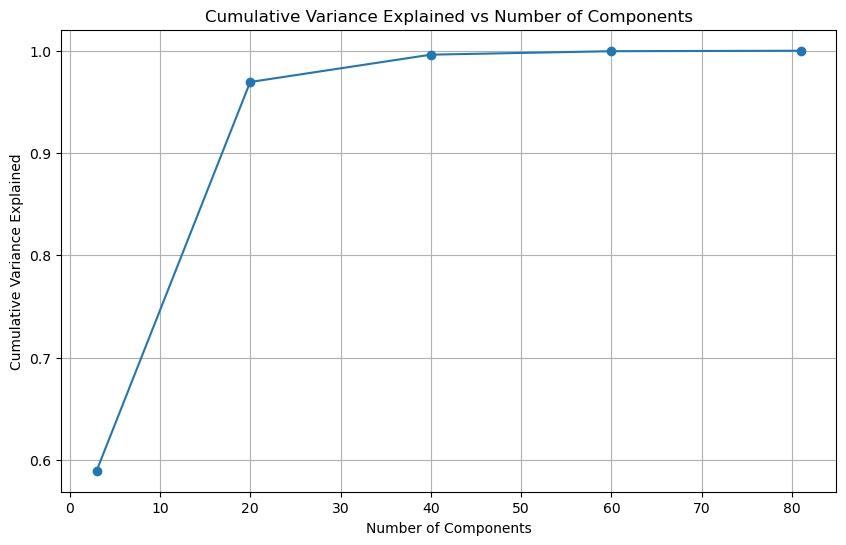

In [16]:
### START CODE ###
## Plot the explained variance vs number of components
plt.figure(figsize=(10, 6))
plt.plot(nums, res, marker='o', linestyle='-')
plt.title('Cumulative Variance Explained vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
### END CODE ###
plt.show()

From the line plot above, when the number of components is 3, the model captures around 58% of the explained variation and losses a significant 42% of the information. However, when we increase the number of component to 20, we can capture a remarkably high percentage, approximately 96.94 %, of the variance in our dataset. This observation suggests that we can substantially reduce the dimensionality of our data while retaining most of its valuable information by using only 20 features out of the original 82. This demonstrates that the majority of the pertinent information is encapsulated within these 20 features, and nearly all of it can be retained by just 20 features. Any additional features beyond this point are essentially redundant and may merely increase the complexity of our model without significantly enhancing its performance.

* **Part 4. (5 points)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and show how adjusted $R^2$ varies as a function of # of components.(There will be a total of 5 ${R^2}$ score).


In [17]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:

    ### START CODE ###
    ## Fit PCA components
    pca = PCA(n_components=num)
    pca.fit(X_train_scaled)
    ### END CODE ###


    ### START CODE ###
    ## Transform train and test data
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    explained_variance = pca.explained_variance_ratio_
    var = explained_variance.cumsum()
    res.append(var[-1])
    ### END CODE ###

    ### START CODE ###
    ## Fit LR and compute R-square and adjusted R-squared
    model = LinearRegression()
    model.fit(X_train_pca, Y_train)
    y_pred = model.predict(X_test_pca)
    r_squared = r2_score(Y_test, y_pred)
    ### END CODE ###

    adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test_pca.shape[1]-1)
    print("Adjusted R^2",adjusted_r_squared)

Adjusted R^2 0.49275148894668674
Adjusted R^2 0.62405106037414
Adjusted R^2 0.688257661463449
Adjusted R^2 0.715572640255469
Adjusted R^2 0.7277522695494445


# Q5. (10 points) PCA vs T-SNE
* **Part 1.** **(3 points)** Now apply T-SNE to the dataset given above in Q4. You are required to carry out the following tasks:



1.   Initialize a t-SNE model with number of dimensions = 3, perplexity = 300, number of iterations = 300 and random state = 42
2.   Apply the t-SNE model to the training dataset











In [18]:
from sklearn.manifold import TSNE

### START CODE ###
## Initialize t-SNE model
model = TSNE(n_components=3, n_iter=300, perplexity=300, random_state=42)
### END CODE ###

### START CODE ###
## Fit and transform the data
X_embedded = model.fit_transform(X_train)
### END CODE ###

* **Part 2.** (3 points) For this part use a small subset of 500 samples of the training dataset and plot the first three t-SNE components similar to the PCA implementation above

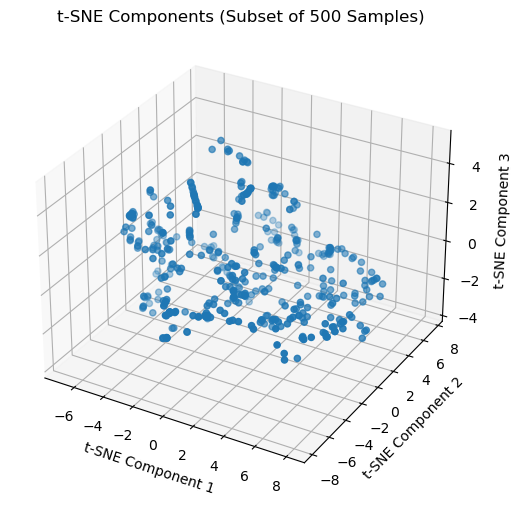

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_embedded[:500, 0], X_embedded[:500, 1], X_embedded[:500, 2], marker='o')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE Components (Subset of 500 Samples)')
plt.show()

* **Part 3. (4 points)** Now we will plot the PCA and t-SNE projections of the data and compare the plots side-by-side to see the difference in scatters created by the two methods. You can use first 1000 data points for this.

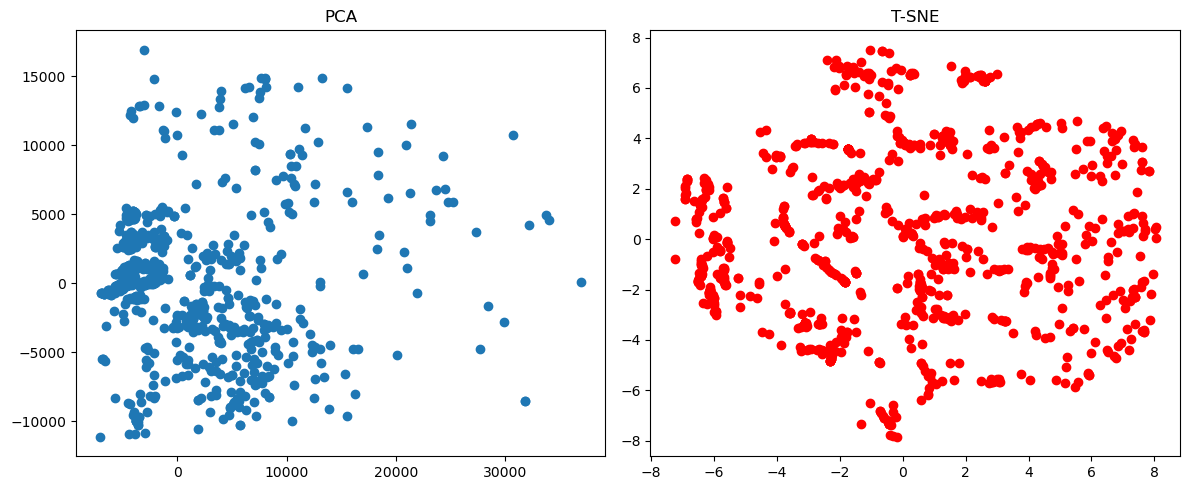

In [20]:
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# First subplot (left)

### START CODE ###
### Obtain components from PCA
X_pca = pca.fit_transform(X_train[:1000])  # Using the first 1000 data points
### END CODE ###

plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
plt.title('PCA')

### START CODE ###
### scatter plot for PCA
plt.scatter(X_pca[:1000, 0], X_pca[:1000, 1], marker='o')
### END CODE ###


# Second subplot (right)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot

### START CODE ###
### scatter plot for t-SNE
plt.scatter(X_embedded[:1000, 0], X_embedded[:1000, 1], c='r', marker='o')
### END CODE ###

plt.title('T-SNE')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()